Training Accuracy: 100.0 %
Testing Accuracy: 90.81632653061224 %

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.91      0.92      0.91        52

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98



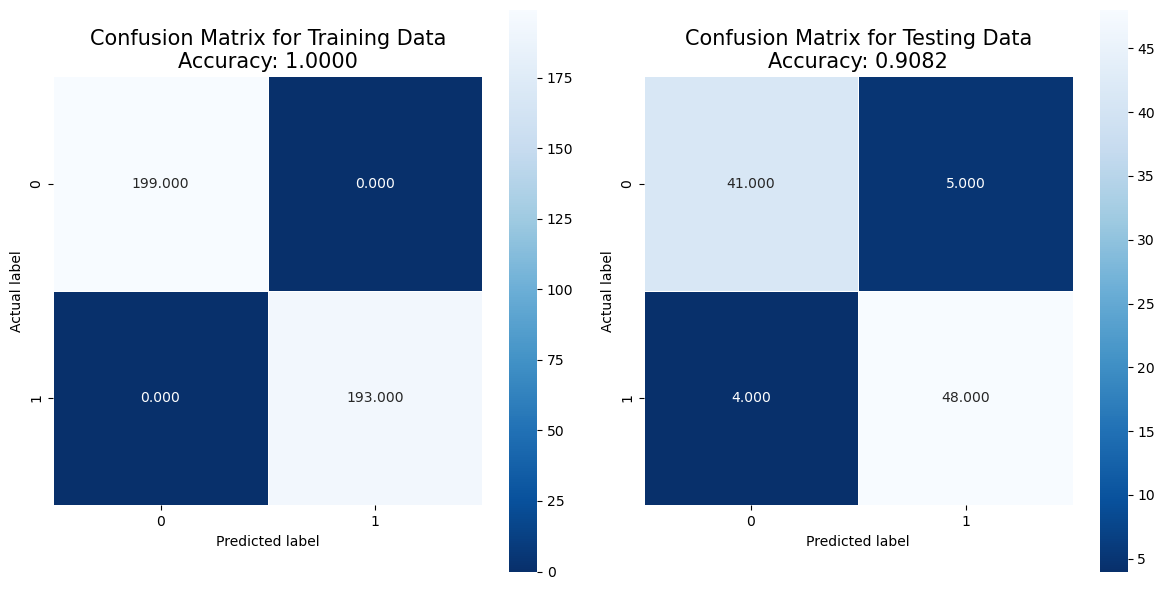

In [ ]:
#No Parameter (Original Hot and Spicy)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"..data/scam_survey_responses.csv"
data = pd.read_csv(file_path)

# Remove the 'Timestamp' column 
data = data.drop(columns=['Timestamp'])

# Rename columns to make them easily referenced
data.columns = [
    "Scammed",
    "Age_Group",
    "Gender",
    "Education_Level",
    "Employment_Status",
    "Income",
    "Internet_Usage_Frequency",
    "Most_Used_Platform",
    "Daily_Online_Hours",
    "Stranger_Interactions",
    "Monthly_Online_Transactions",
    "Active_Social_Media_Accounts",
    "Email_Accounts",
    "Shares_Personal_Info",
    "Different_Passwords",
    "Downloads_From_Untrusted_Sources",
    "Response_To_Suspicious_Contacts",
    "Online_Subscriptions",
    "Reads_Reviews_Before_Buying",
    "Max_Single_Transaction_Spend",
]

# Convert specified columns to numeric (coerce errors into NaN)
columns_to_convert = [
    "Income",
    "Daily_Online_Hours",
    "Monthly_Online_Transactions",
    "Active_Social_Media_Accounts",
    "Email_Accounts",
    "Different_Passwords",
    "Downloads_From_Untrusted_Sources",
    "Online_Subscriptions",
    "Max_Single_Transaction_Spend"
]

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')
data[columns_to_convert] = data[columns_to_convert].fillna(0)

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and label
features = [col for col in data.columns if col != 'Scammed']
X = data[features]

y = data['Scammed']

# Upsample the minority class
majority = data[data['Scammed'] == 0]
minority = data[data['Scammed'] == 1]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
balanced_data = pd.concat([majority, minority_upsampled])

X_balanced = balanced_data[features]
y_balanced = balanced_data['Scammed']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100, "%")
print("Testing Accuracy:", test_accuracy * 100, "%")
print("\nClassification Report (Test Set):\n", report)

# Visualize the performance on confusion matrices for both training and testing data
plt.figure(figsize=(12, 6))

# Confusion Matrix for Training Data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.heatmap(skm.confusion_matrix(y_train, y_train_pred), annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix for Training Data\nAccuracy: {train_accuracy:.4f}', size=15)

# Confusion Matrix for Testing Data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.heatmap(skm.confusion_matrix(y_test, y_test_pred), annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix for Testing Data\nAccuracy: {test_accuracy:.4f}', size=15)

# Show the plot
plt.tight_layout()
plt.show()


# Export the cleaned dataset
data.to_csv(r"../data/cleaned_scam_data.csv", index=False)
# Combine X_train and y_train into a single DataFrame  
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)  
# Combine X_test and y_test into a single DataFrame  
test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)  
# Save the combined training and testing datasets to CSV files  
train_data.to_csv(r'../data/train_data.csv', index=False)  
test_data.to_csv(r'../data/test_data.csv', index=False)   
